In [ ]:
import torch
from torch import nn

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
torch.cuda.is_available()

False

In [ ]:
import numpy

lst = [1, 2, 3]

numpy_list = numpy.array(lst)

print(type(numpy_list))

<class 'numpy.ndarray'>


In [ ]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)


test_data =  datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
train_dataloader = DataLoader(
  dataset = train_data,
  batch_size = 512,
  shuffle = True,
)

test_dataloader = DataLoader(
  dataset = test_data,
  batch_size = 512,
  shuffle = True,
)

In [ ]:
train_dataloader

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.relu_stack(x)
    return logits


In [ ]:
model = NeuralNetwork()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (x,y) in enumerate(dataloader):
    pred = model(x)
    loss = loss_fn(pred, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(x)
      print(f'loss: {loss} [{current}/{size}]')

In [ ]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for x,y in dataloader:
      pred = model(x)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1)==y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Accuracy: {(100*correct)} \n Average Loss: {test_loss}")

In [ ]:
epochs = 20

for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)

print("Training Completed")

Epoch 1
-------------------------------
loss: 2.3014585971832275 [512/60000]
loss: 0.23792752623558044 [51712/60000]
Test Accuracy: 94.42 
 Average Loss: 0.19169214814901353
Epoch 2
-------------------------------
loss: 0.16394643485546112 [512/60000]
loss: 0.11043521016836166 [51712/60000]
Test Accuracy: 96.45 
 Average Loss: 0.1126879595220089
Epoch 3
-------------------------------
loss: 0.09634947776794434 [512/60000]
loss: 0.08392035961151123 [51712/60000]
Test Accuracy: 96.97 
 Average Loss: 0.0957910392433405
Epoch 4
-------------------------------
loss: 0.06065954267978668 [512/60000]
loss: 0.05616749823093414 [51712/60000]
Test Accuracy: 97.57000000000001 
 Average Loss: 0.07218094244599342
Epoch 5
-------------------------------
loss: 0.023813746869564056 [512/60000]
loss: 0.02144673652946949 [51712/60000]
Test Accuracy: 97.89 
 Average Loss: 0.06808939445763826
Epoch 6
-------------------------------
loss: 0.02987810969352722 [512/60000]
loss: 0.027885744348168373 [51712/600

Predicted: 9 
Actual: 9


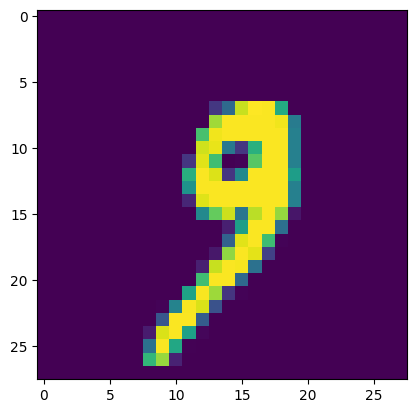

In [ ]:
import matplotlib.pyplot as plt

index = 1000

model.eval()

x, y = test_data[index][0], test_data[index][1]

plt.imshow(x[0])

with torch.no_grad():
  pred = model(x)
  predicted, actual = pred[0].argmax(0), y
  print(f"Predicted: {predicted} \nActual: {actual}")

In [ ]:
pred

tensor([[ -5.5122,  -5.4064,  -8.8024,   5.8877,  -2.8793,  -7.7270, -19.1880,
           0.6391,  -9.1522,  12.5136]])